# CH6

In [1]:
from bs4 import BeautifulSoup

In [2]:
html = """
 <div class='full_name'><span style='font-weight:bold'>
 Masego</span> Azra</div>"
 """

In [3]:
# Parse html
soup = BeautifulSoup(html, "lxml")
# Find the div with the class "full_name", show text
soup.find("div", { "class" : "full_name" }).text

'\n Masego Azra'

In [4]:
import unicodedata
import sys

# Create text
text_data = ['Hi!!!! I. Love. This. Song....',
 '10000% Agree!!!! #LoveIT',
 'Right?!?!']

# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            
if unicodedata.category(chr(i)).startswith('P'))
# For each string, remove any punctuation characters
[string.translate(punctuation) for string in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

In [5]:
# Load library
from nltk.tokenize import word_tokenize

# Create text
string = "The science of today is the technology of tomorrow"

# Tokenize words
word_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

In [6]:
# Load library
from nltk.tokenize import sent_tokenize

# Create text
string = "The science of today is the technology of tomorrow. Tomorrow is today."

# Tokenize sentences
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

* 독특하시네요.. [word for word in tokenized_words if word not in stop_words]

In [7]:
# Load library
from nltk.corpus import stopwords

# Create word tokens
tokenized_words = ['i',
 'am',
 'going',
 'to',
 'go',
 'to',
 'the',
 'store',
 'and',
 'park']

# Load stop words
stop_words = stopwords.words('english')

# Remove stop words 
[word for word in tokenized_words if word not in stop_words]

['going', 'go', 'store', 'park']

In [8]:
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [9]:
# Load library
from nltk.stem.porter import PorterStemmer

# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']

# Create stemmer
porter = PorterStemmer()

# Apply stemmer
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

#### Part of speech : 품사

In [10]:
# Load libraries
from nltk import pos_tag
from nltk import word_tokenize

# Create text
text_data = "Chris loved outdoor running"

# Use pre-trained part of speech tagger
text_tagged = pos_tag(word_tokenize(text_data))

# Show parts of speech
text_tagged

[('Chris', 'NNP'), ('loved', 'VBD'), ('outdoor', 'RP'), ('running', 'VBG')]

In [11]:
# Filter words
[word for word, tag in text_tagged if tag in ['NN','NNS','NNP','NNPS'] ]
['Chris']

['Chris']

In [12]:
import nltk
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import pos_tag

# Create text
tweets = ["I am eating a burrito for breakfast",
 "Political science is an amazing field",
 "San Francisco is an awesome city"]

# Create list
tagged_tweets = []

# Tag each word and each tweet
for tweet in tweets:
    tweet_tag = nltk.pos_tag(word_tokenize(tweet))
    tagged_tweets.append([tag for word, tag in tweet_tag])
    
# Use one-hot encoding to convert the tags into features
one_hot_multi = MultiLabelBinarizer()
one_hot_multi.fit_transform(tagged_tweets)

array([[1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1]])

In [13]:
one_hot_multi.classes_

array(['DT', 'IN', 'JJ', 'NN', 'NNP', 'PRP', 'VBG', 'VBP', 'VBZ'],
      dtype=object)

In [14]:
# Load library
from nltk.corpus import brown
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

# Get some text from the Brown Corpus, broken into sentences
sentences = brown.tagged_sents(categories='news')

# Split into 4000 sentences for training and 623 for testing
train = sentences[:4000]
test = sentences[4000:]

# Create backoff tagger
unigram = UnigramTagger(train)
bigram = BigramTagger(train, backoff=unigram)
trigram = TrigramTagger(train, backoff=bigram)

# Show accuracy
trigram.evaluate(test)

0.8174734002697437

In [15]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Create text
text_data = np.array(['I love Brazil. Brazil!',
 'Sweden is best',
'Germany beats both'])

# Create the bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

# Show feature matrix
bag_of_words

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [16]:
bag_of_words.toarray()

array([[0, 0, 0, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [17]:
count.get_feature_names()

['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love', 'sweden']

In [18]:
count_2gram = CountVectorizer(ngram_range=(1,2),
stop_words="english",
vocabulary=['brazil'])

bag = count_2gram.fit_transform(text_data)
# View feature matrix
bag.toarray()

array([[2],
       [0],
       [0]], dtype=int64)

In [19]:
count_2gram.vocabulary_

{'brazil': 0}

In [20]:
# Load libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# Create text
text_data = np.array(['I love Brazil. Brazil!',
 'Sweden is best',
'Germany beats both'])
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)
# Show tf-idf feature matrix
feature_matrix

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [21]:
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [22]:
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

# CH7

In [23]:
# Load libraries
import numpy as np
import pandas as pd
# Create strings
date_strings = np.array(['03-04-2005 11:35 PM',
 '23-05-2010 12:01 AM',
'04-09-2009 09:09 PM'])

# Convert to datetimes
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_strings]
[pd.Timestamp('2005-04-03 23:35:00'),
 pd.Timestamp('2010-05-23 00:01:00'),
 pd.Timestamp('2009-09-04 21:09:00')]

# Convert to datetimes
[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="coerce")
for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [24]:
# Load library
import pandas as pd

# Create datetime
pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London')
pd.Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

# Create datetime
date = pd.Timestamp('2017-05-01 06:00:00')

# Set time zone
date_in_london = date.tz_localize('Europe/London')

# Show datetime
date_in_london

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [25]:
# Change time zone
date_in_london.tz_convert('Africa/Abidjan')

Timestamp('2017-05-01 05:00:00+0000', tz='Africa/Abidjan')

In [26]:
# Create three dates
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))
# Set time zone
dates.dt.tz_localize('Africa/Abidjan')

0   2002-02-28 00:00:00+00:00
1   2002-03-31 00:00:00+00:00
2   2002-04-30 00:00:00+00:00
dtype: datetime64[ns, Africa/Abidjan]

In [27]:
from pytz import all_timezones
# Show two time zones
all_timezones[0:2]

['Africa/Abidjan', 'Africa/Accra']

In [28]:
# Load library
import pandas as pd

# Create data frame
dataframe = pd.DataFrame()

# Create datetimes
dataframe['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')
# Select observations between two datetimes
dataframe[(dataframe['date'] > '2002-1-1 01:00:00') &
 (dataframe['date'] <= '2002-1-1 04:00:00')]

,date
8762,2002-01-01 02:00:00
8763,2002-01-01 03:00:00
8764,2002-01-01 04:00:00


In [29]:
# Set index
dataframe = dataframe.set_index(dataframe['date'])

# Select observations between two datetimes
dataframe.loc['2002-1-1 01:00:00':'2002-1-1 04:00:00']

,date
date,
2002-01-01 01:00:00,2002-01-01 01:00:00
2002-01-01 02:00:00,2002-01-01 02:00:00
2002-01-01 03:00:00,2002-01-01 03:00:00
2002-01-01 04:00:00,2002-01-01 04:00:00


In [30]:
# Load library
import pandas as pd

# Create data frame
dataframe = pd.DataFrame()

# Create five dates
dataframe['date'] = pd.date_range('1/1/2001', periods=150, freq='W')

# Create features for year, month, day, hour, and minute
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day
dataframe['hour'] = dataframe['date'].dt.hour
dataframe['minute'] = dataframe['date'].dt.minute

# Show three rows
dataframe.head(3)

,date,year,month,day,hour,minute
0,2001-01-07,2001,1,7,0,0
1,2001-01-14,2001,1,14,0,0
2,2001-01-21,2001,1,21,0,0


In [31]:
# Load library
import pandas as pd

# Create data frame
dataframe = pd.DataFrame()

# Create two datetime features
dataframe['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
dataframe['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

# Calculate duration between features
dataframe['Left'] - dataframe['Arrived']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [32]:
# Calculate duration between features
pd.Series(delta.days for delta in (dataframe['Left'] - dataframe['Arrived']))

0    0
1    2
dtype: int64

In [33]:
# Load library
import pandas as pd

# Create dates
dates = pd.Series(pd.date_range("2/2/2002", periods=3, freq="M"))

# Show days of the week ; monday = 0
dates.dt.weekday

0    3
1    6
2    1
dtype: int64

In [34]:
# Load library
import pandas as pd

# Create data frame
dataframe = pd.DataFrame()

# Create data
dataframe["dates"] = pd.date_range("1/1/2001", periods=5, freq="D")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]

# Lagged values by one row
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(1)

# Show data frame
dataframe

,dates,stock_price,previous_days_stock_price
0,2001-01-01,1.1,NaN
1,2001-01-02,2.2,1.1
2,2001-01-03,3.3,2.2
3,2001-01-04,4.4,3.3
4,2001-01-05,5.5,4.4


In [35]:
# Load library
import pandas as pd

# Create datetimes
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# Create data frame, set index
dataframe = pd.DataFrame(index=time_index)

# Create feature
dataframe["Stock_Price"] = [1,2,3,4,5]

# Calculate rolling mean
dataframe.rolling(window=2).mean()

,Stock_Price
2010-01-31,NaN
2010-02-28,1.5
2010-03-31,2.5
2010-04-30,3.5
2010-05-31,4.5


In [36]:
# Load libraries
import pandas as pd
import numpy as np

# Create date
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# Create data frame, set index
dataframe = pd.DataFrame(index=time_index)

# Create feature with a gap of missing values
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]

# Interpolate missing values
dataframe.interpolate()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,4.0
2010-05-31,5.0


In [37]:
dataframe.ffill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,2.0
2010-04-30,2.0
2010-05-31,5.0


In [38]:
dataframe.bfill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,5.0
2010-04-30,5.0
2010-05-31,5.0


In [39]:
dataframe.interpolate(method="quadratic")

,Sales
2010-01-31,1.000000
2010-02-28,2.000000
2010-03-31,3.059808
2010-04-30,4.038069
2010-05-31,5.000000


In [40]:
dataframe.interpolate(limit=1, limit_direction="forward")

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,NaN
2010-05-31,5.0


# CH8

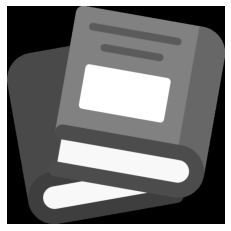

In [41]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [42]:
# Show data type
type(image)

numpy.ndarray

In [43]:
image.shape

(512, 512)

In [44]:
image[0,0]

0

In [45]:
# Load image in color
image_bgr = cv2.imread("book.png", cv2.IMREAD_COLOR)

In [46]:
image_bgr[0,0]

array([0, 0, 0], dtype=uint8)

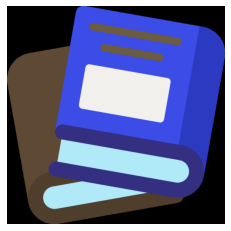

In [47]:
plt.imshow(image_bgr), plt.axis("off")
plt.show()

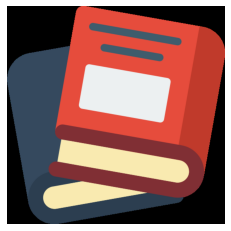

In [48]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)
# Save image
cv2.imwrite("book_new.png", image)

True

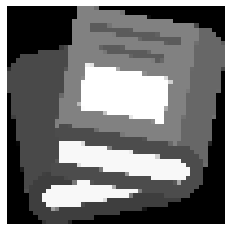

In [50]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

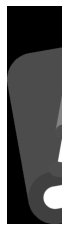

In [51]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Select first half of the columns and all rows
image_cropped = image[:,:128]
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

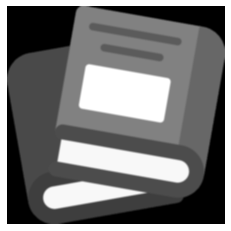

In [52]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Blur image
image_blurry = cv2.blur(image, (5,5))
# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

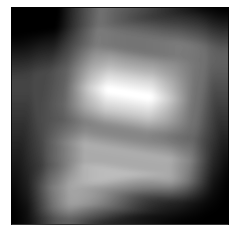

In [53]:
# Blur image
image_very_blurry = cv2.blur(image, (100,100))
# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

In [54]:
# Create kernel
kernel = np.ones((5,5)) / 25.0
# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [55]:
image_kernel = cv2.filter2D(image, -1, kernel)

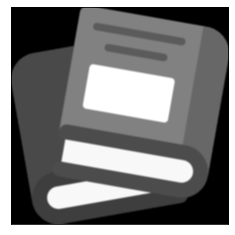

In [56]:
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

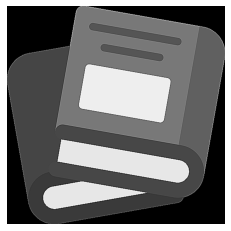

In [57]:
# Create kernel
kernel = np.array([[0, -1, 0],
 [-1, 5,-1],
 [0, -1, 0]])
# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

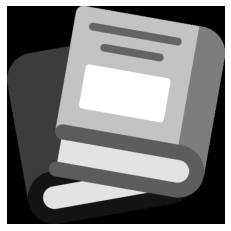

In [58]:
# Enhance image
image_enhanced = cv2.equalizeHist(image)
# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

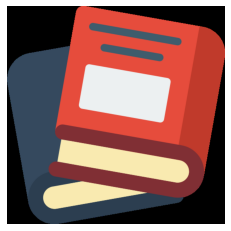

In [59]:
image_bgr = cv2.imread("book.png")
plt.imshow(image_rgb), plt.axis("off")
plt.show()

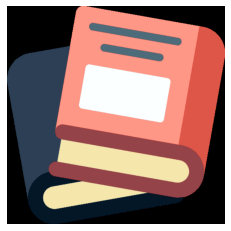

In [60]:
# Load image
image_bgr = cv2.imread("book.png")
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

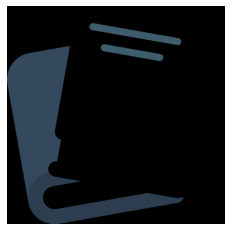

In [61]:
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])
# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

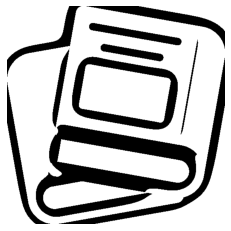

In [63]:
# Load image as grayscale
image_grey = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
 max_output_value,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

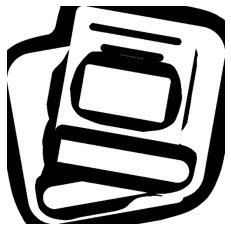

In [64]:
# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
 max_output_value,
cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

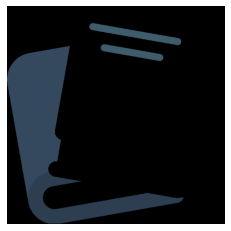

In [68]:
# Rectangle values: start x, start y, width, height
rectangle = (0, 0, 511, 511)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# Run grabCut
cv2.grabCut(image_rgb, # Our image
 mask, # The Mask
 rectangle, # Our rectangle
 bgdModel, # Temporary array for background
 fgdModel, # Temporary array for background
 5, # Number of iterations
 cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle
# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

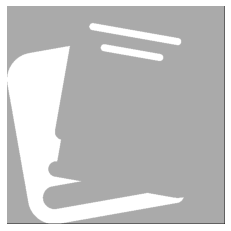

In [69]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

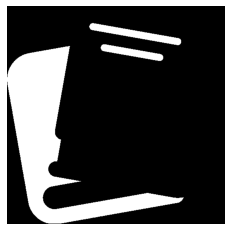

In [70]:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

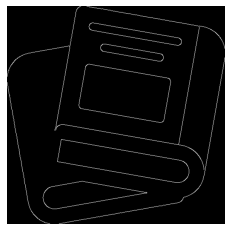

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_gray = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)
# Calculate median intensity
median_intensity = np.median(image_gray)
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

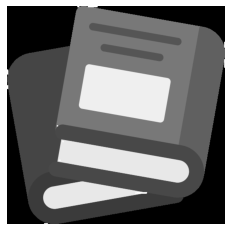

In [73]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_bgr = cv2.imread("book.png")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04
# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
 block_size,
aperture,
free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)
# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
 threshold *
 detector_responses.max()] = [255,255,255]
# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

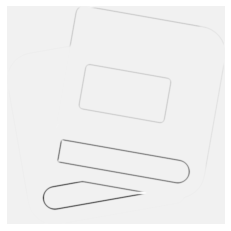

In [74]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

In [75]:
# Load images
image_bgr = cv2.imread('book.png')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# Number of corners to detect
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

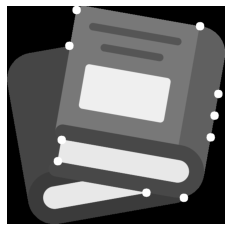

In [76]:
# Detect corners
corners = cv2.goodFeaturesToTrack(image_gray,
 corners_to_detect,
minimum_quality_score,
minimum_distance)
corners = np.float32(corners)
# Draw white circle at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)
# Convert to grayscale
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

In [77]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)
# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))
# Convert image data to one-dimensional vector
image_10x10.flatten()

array([  0,   0,   0, 120, 120, 120,  12,   0,   0,   0,   0,   0,   0,
       120, 120, 120,  85,  85, 120,  96,  69,  69,  69, 120, 120, 120,
       120, 120, 120,  96,  69,  69,  69, 235, 238, 238, 238, 194,  96,
        96,  69,  69, 120, 238, 238, 238, 238, 120,  96,  96,  69,  69,
        71, 120, 120, 120, 120, 120,  96,   0,   0,  69, 231, 231, 231,
        71,  71,  71,  96,   0,   0,  69,  71,  71, 231, 231, 231, 231,
        71,   0,   0,  58, 231, 231, 231, 231,  71,  71,  71,   0,   0,
        58,  58,  58,  58,   0,   0,   0,   0,   0], dtype=uint8)

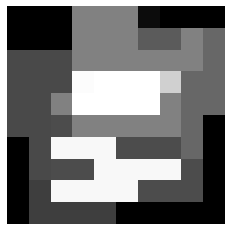

In [78]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [79]:
image_10x10.shape

(10, 10)

In [80]:
image_10x10.flatten().shape

(100,)

In [82]:
# Load image in color
image_color = cv2.imread("book.png", cv2.IMREAD_COLOR)
# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))

In [83]:
image_color_10x10.flatten().shape

(300,)

In [85]:
# Load image in grayscale
image_256x256_gray = cv2.imread("book.png", cv2.IMREAD_GRAYSCALE)
# Convert image data to one-dimensional vector, show dimensions
image_256x256_gray.flatten().shape

# Load image in color
image_256x256_color = cv2.imread("book.png", cv2.IMREAD_COLOR)
# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape

(786432,)

In [86]:
image_bgr = cv2.imread("book.png", cv2.IMREAD_COLOR)
# Calculate the mean of each channel
channels = cv2.mean(image_bgr)
# Swap blue and red values (making it RGB, not BGR)
observation = np.array([(channels[2], channels[1], channels[0])])
# Show mean channel values
observation

array([[128.86672592,  81.55561066,  76.14129639]])

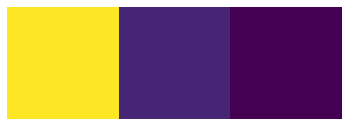

In [87]:
# Show image
plt.imshow(observation), plt.axis("off")
plt.show()

In [91]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image_bgr = cv2.imread("book.png", cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Create a list for feature values
features = []
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
         [i], # Index of channel
         None, # No mask
        [256], # Histogram size
         [0,256]) # Range
    features.extend(histogram)
# Create a vector for an observation's feature values
observation = np.array(features).flatten()
# Show the observation's value for the first five features
observation[0:5]

array([61500.,     0.,     0.,     0.,     0.], dtype=float32)

In [92]:
image_rgb[0,0]


array([0, 0, 0], dtype=uint8)

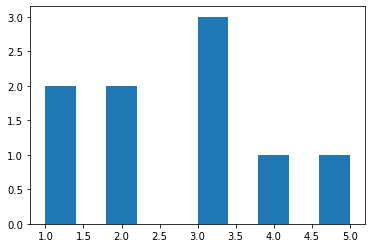

In [93]:
import pandas as pd
# Create some data
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])
# Show the histogram
data.hist(grid=False)
plt.show()

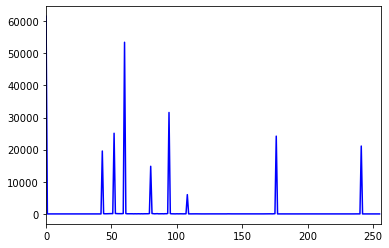

In [94]:
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
     [i], # Index of channel
     None, # No mask
    [256], # Histogram size
     [0,256]) # Range
plt.plot(histogram, color = channel)
plt.xlim([0,256])
# Show plot
plt.show()

# CH9

In [95]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
# Load the data
digits = datasets.load_digits()
# Standardize the feature matrix
features = StandardScaler().fit_transform(digits.data)
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
features_pca = pca.fit_transform(features)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


In [96]:
# Load libraries
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
# Create linearly inseparable data
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
# Apply kernal PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])


Original number of features: 2
Reduced number of features: 1


In [97]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load Iris flower dataset:
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create and run an LDA, then use it to transform the features
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
# Print the number of features
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_lda.shape[1])


Original number of features: 4
Reduced number of features: 1


In [102]:
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
# Create function
def select_n_components(var_ratio, goal_var: float) -> int:
 # Set initial variance explained so far
    total_variance = 0.0
 # Set initial number of features
    n_components = 0
 # For the explained variance of each feature:
    for explained_variance in var_ratio:
 # Add the explained variance to the total
        total_variance += explained_variance
 # Add one to the number of components
        n_components += 1
 # If we reach our goal level of explained variance
        if total_variance >= goal_var:
 # End the loop
            break
 # Return the number of components
    return n_components
# Run function
select_n_components(lda_var_ratios, 0.95)

1

In [103]:
# Load libraries
from sklearn.decomposition import NMF
from sklearn import datasets
# Load the data
digits = datasets.load_digits()
# Load feature matrix
features = digits.data
# Create, fit, and apply NMF
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_nmf.shape[1])


Original number of features: 64
Reduced number of features: 10


C:\Users\AHR\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [105]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np
# Load the data
digits = datasets.load_digits()
# Standardize feature matrix
features = StandardScaler().fit_transform(digits.data)
# Make sparse matrix
features_sparse = csr_matrix(features)
# Create a TSVD
tsvd = TruncatedSVD(n_components=10)
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
# Show results
print("Original number of features:", features_sparse.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1])

Original number of features: 64
Reduced number of features: 10


In [106]:
# Sum of first three components' explained variance ratios
tsvd.explained_variance_ratio_[0:3].sum()

0.3003938536505261

In [107]:
# Create and run an TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_
# Create a function
def select_n_components(var_ratio, goal_var):
    # Set initial variance explained so far
    total_variance = 0.0
 # Set initial number of features
    n_components = 0
 # For the explained variance of each feature:
    for explained_variance in var_ratio:
 # Add the explained variance to the total
        total_variance += explained_variance
 # Add one to the number of components
        n_components += 1
 # If we reach our goal level of explained variance
        if total_variance >= goal_var:
 # End the loop
            break
 # Return the number of components
    return n_components
# Run function
select_n_components(tsvd_var_ratios, 0.95)

40

# CH10

In [108]:
# Load libraries
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
# import some data to play with
iris = datasets.load_iris()
# Create features and target
features = iris.data
target = iris.target
# Create thresholder
thresholder = VarianceThreshold(threshold=.5)
# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(features)
# View high variance feature matrix
features_high_variance[0:3]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2]])

In [112]:
# View variances
thresholder.fit(features).variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [113]:
# Load library
from sklearn.preprocessing import StandardScaler
# Standardize feature matrix
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Caculate variance of each feature
selector = VarianceThreshold()
selector.fit(features_std).variances_

array([1., 1., 1., 1.])

In [114]:
# Load library
from sklearn.feature_selection import VarianceThreshold
# Create feature matrix with:
# Feature 0: 80% class 0
# Feature 1: 80% class 1
# Feature 2: 60% class 0, 40% class 1
features = [[0, 1, 0],
 [0, 1, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0]]
# Run threshold by variance
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [115]:
# Load libraries
import pandas as pd
import numpy as np
# Create feature matrix with two highly correlated features
features = np.array([[1, 1, 1],
 [2, 2, 0],
 [3, 3, 1],
 [4, 4, 0],
 [5, 5, 1],
 [6, 6, 0],
 [7, 7, 1],
 [8, 7, 0],
 [9, 7, 1]])
# Convert feature matrix into DataFrame
dataframe = pd.DataFrame(features)
# Create correlation matrix
corr_matrix = dataframe.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
 k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
dataframe.drop(dataframe.columns[to_drop], axis=1).head(3)

,0,2
0,1,1
1,2,0
2,3,1


In [116]:
dataframe.corr()

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,-0.034503
2,0.000000,-0.034503,1.000000


In [117]:
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [118]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
# Load data
iris = load_iris()
features = iris.data
target = iris.target
# Convert to categorical data by converting data to integers
features = features.astype(int)
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [119]:
# Select two features with highest F-values
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

In [120]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [121]:
# Load library
from sklearn.feature_selection import SelectPercentile
# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 3


In [122]:
# Load libraries
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model
# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy",
 message="^internal gelsd")
# Generate features matrix, target vector, and the true coefficients
features, target = make_regression(n_samples = 10000,
 n_features = 100,
 n_informative = 2,
random_state = 1)

# Create a linear regression
ols = linear_model.LinearRegression()
# Recursively eliminate features
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

array([[-0.76165969,  0.00850799, -0.1743876 , ..., -0.26903836,
        -0.00334006, -0.43443631],
       [-0.46550514, -1.07500204, -0.13792708, ..., -0.71990239,
         0.83025386,  0.49521824],
       [ 1.36836958,  1.37940721,  0.04954512, ...,  0.49558942,
         1.57437341, -0.86151394],
       ...,
       [ 0.39023196, -0.80331656,  1.19182077, ...,  0.22900133,
         0.95453857, -0.32710863],
       [ 0.44825266,  0.39508844,  0.1869861 , ...,  0.02723818,
         0.3561363 , -0.18744426],
       [ 1.15616404, -0.55383035, -2.20666674, ..., -1.08865284,
        -0.47269736, -0.36458525]])

In [123]:
rfecv.n_features_

9

In [124]:
rfecv.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False])

In [125]:
rfecv.ranking_

array([43,  1, 52, 40, 25,  1, 30, 12, 72,  5, 75, 24, 55, 45, 39, 73, 47,
       36,  1, 38, 74, 87, 21, 17, 13, 56, 11,  4,  3, 33,  9, 59, 22, 29,
        1, 63, 34, 41, 84,  1, 10, 26, 28, 71, 78, 42, 91,  1, 88, 92, 85,
       54, 80, 81, 31, 86, 48,  7, 20, 62, 83, 50,  6, 37, 60, 65, 57, 76,
       46, 49, 44,  2, 15, 66, 16, 35, 90, 82, 77, 69, 64, 32, 18, 51, 23,
       67,  1,  1,  8, 53,  1, 89, 68, 58, 79, 61, 27, 70, 14, 19])